In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
b=pd.read_csv("/content/drive/MyDrive/diabetes.zip")

In [ ]:
print(b.head())
print(b.describe)
print(b.info())


   Age  Gender  BMI Blood Pressure  FBS  HbA1c Family History of Diabetes  \
0   45    Male   25         Normal  100    5.7                         No   
1   55  Female   30           High  120    6.4                        Yes   
2   65    Male   35           High  140    7.1                        Yes   
3   75  Female   40           High  160    7.8                        Yes   
4   40    Male   20         Normal   80    5.0                         No   

  Smoking     Diet Exercise Diagnosis  
0      No  Healthy  Regular        No  
1     Yes     Poor       No       Yes  
2     Yes     Poor       No       Yes  
3     Yes     Poor       No       Yes  
4      No  Healthy  Regular        No  
<bound method NDFrame.describe of      Age  Gender  BMI Blood Pressure  FBS  HbA1c Family History of Diabetes  \
0     45    Male   25         Normal  100    5.7                         No   
1     55  Female   30           High  120    6.4                        Yes   
2     65    Male   35     

In [ ]:
print(b.isnull().sum())
print(b.duplicated)

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64
<bound method DataFrame.duplicated of      Age  Gender  BMI Blood Pressure  FBS  HbA1c Family History of Diabetes  \
0     45    Male   25         Normal  100    5.7                         No   
1     55  Female   30           High  120    6.4                        Yes   
2     65    Male   35           High  140    7.1                        Yes   
3     75  Female   40           High  160    7.8                        Yes   
4     40    Male   20         Normal   80    5.0                         No   
..   ...     ...  ...            ...  ...    ...                        ...   
123   17  Female   15         Normal  100   

In [ ]:
print(b.drop_duplicates(inplace=True))
print(b.duplicated().sum())
print(b["Gender"].value_counts())
print(b.dropna())

None
0
Gender
Male      68
Female    60
Name: count, dtype: int64
     Age  Gender  BMI Blood Pressure  FBS  HbA1c Family History of Diabetes  \
0     45    Male   25         Normal  100    5.7                         No   
1     55  Female   30           High  120    6.4                        Yes   
2     65    Male   35           High  140    7.1                        Yes   
3     75  Female   40           High  160    7.8                        Yes   
4     40    Male   20         Normal   80    5.0                         No   
..   ...     ...  ...            ...  ...    ...                        ...   
123   17  Female   15         Normal  100    5.7                         No   
124   22    Male   19         Normal  120    6.4                         No   
125   27  Female   24           High  140    7.1                         No   
126   32    Male   29           High  160    7.8                         No   
127   37  Female   34           High  180    8.5                 

In [ ]:
print(b.shape)
print(b["Blood Pressure"].value_counts())

(128, 11)
Blood Pressure
High      79
Normal    39
Low       10
Name: count, dtype: int64


In [ ]:
b.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


 COUNTPLOT

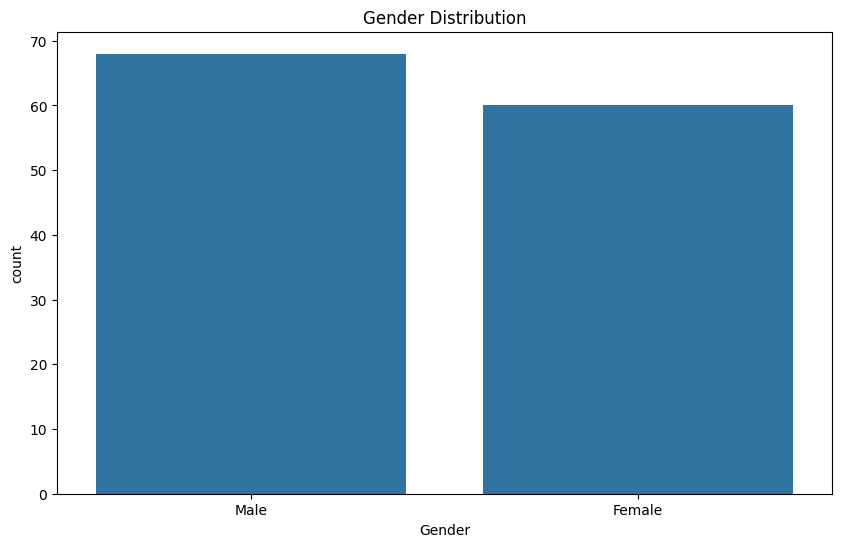

In [ ]:
# prompt: build plot

# Assuming 'b' is your DataFrame from the previous code
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=b)
plt.title('Gender Distribution')

plt.show()


HISTPLOT

<Axes: xlabel='Smoking', ylabel='Count'>

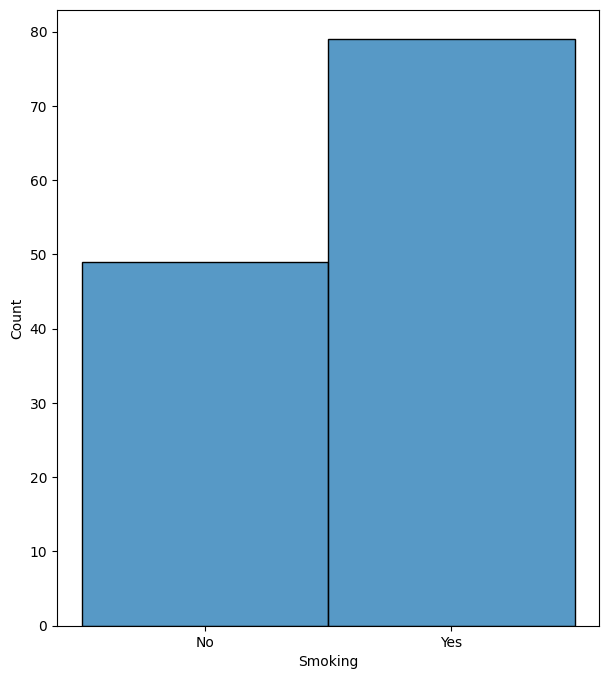

In [ ]:
plt.figure(figsize=(7,8))
sns.histplot(x='Smoking',data=b)

Boxplot

Text(0.5, 1.0, 'Gender')

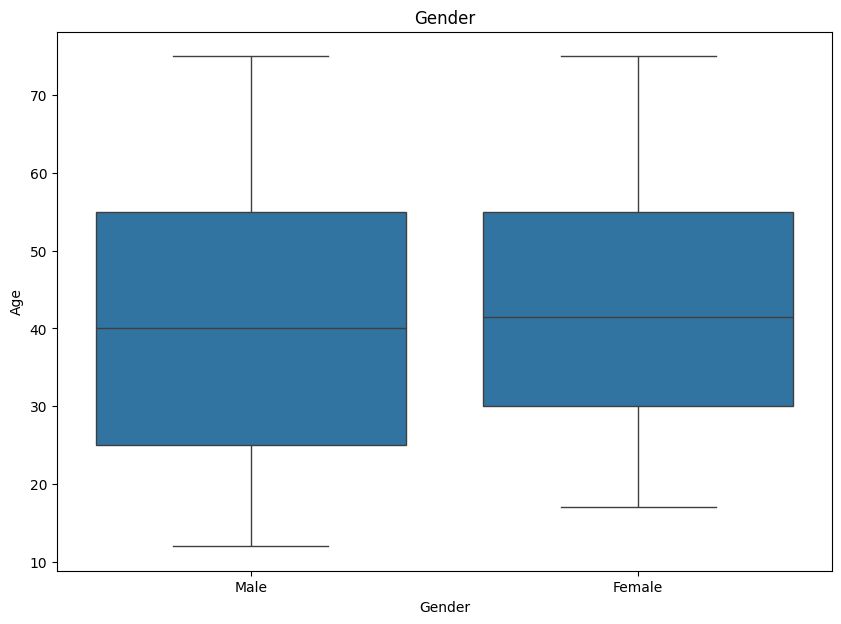

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Gender",y="Age",data=b)
plt.title("Gender")

PIECHAT

([<matplotlib.patches.Wedge at 0x7c8b2df18dd0>,
 [Text(-0.10781885436251672, 1.0947031993394167, 'Male'),
  Text(0.1078188543625161, -1.0947031993394167, 'Female')],
 [Text(-0.05881028419773639, 0.5971108360033182, '53.1%'),
  Text(0.058810284197736054, -0.5971108360033182, '46.9%')])

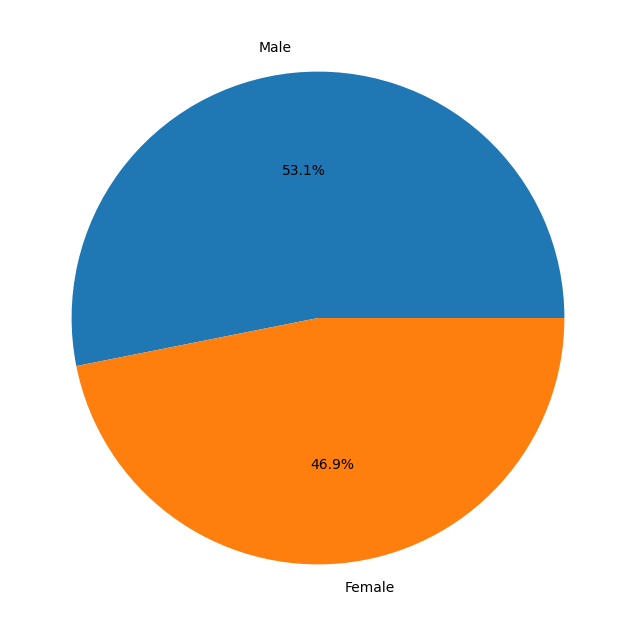

In [ ]:
plt.figure(figsize=(10,8))
gender=b["Gender"].value_counts()
plt.pie(gender,labels=["Male","Female"],autopct="%1.1f%%")

**BARPLOT**

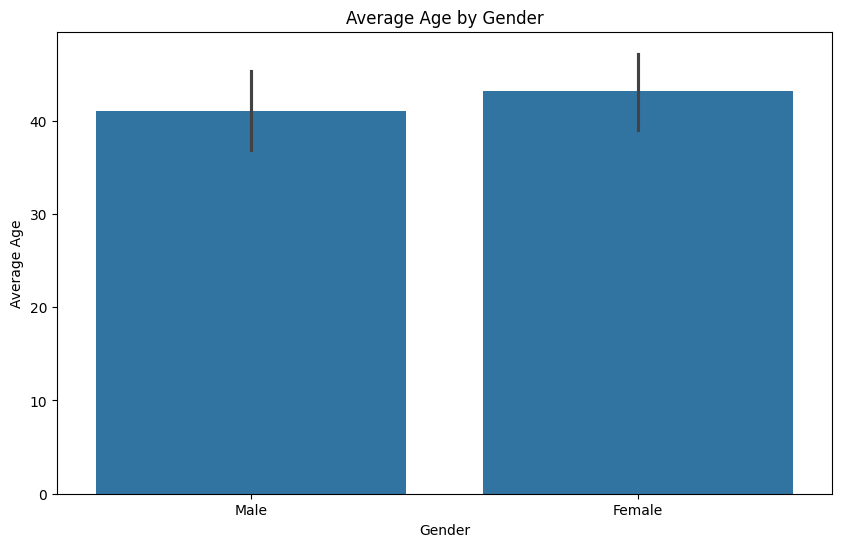

In [ ]:
# prompt: build barplot

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Age', data=b, estimator=np.mean)  # Use 'estimator' to specify aggregation
plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.show()


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'FBS'}>,
        <Axes: title={'center': 'HbA1c'}>]], dtype=object)

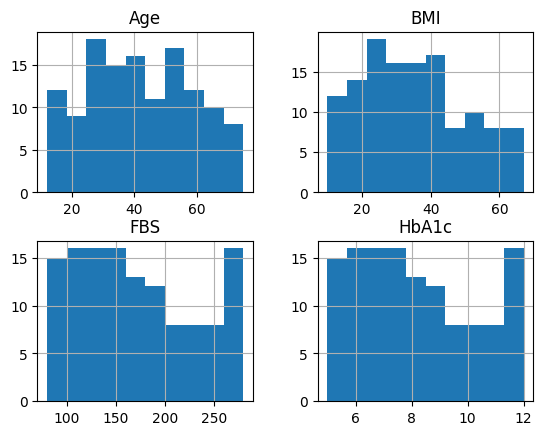

In [ ]:
b.hist()

<Figure size 1000x800 with 0 Axes>

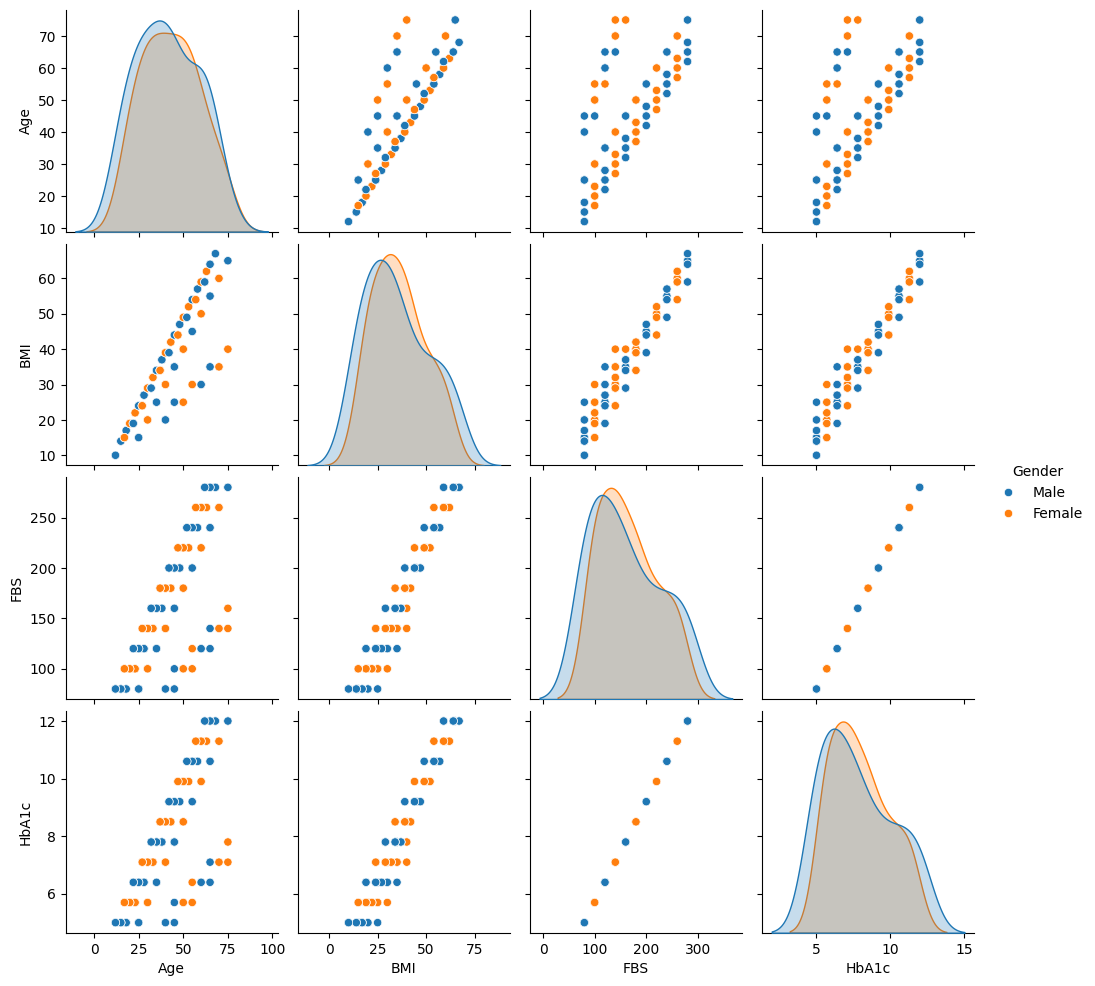

In [ ]:
# prompt: build pairplot code

# Pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(b, hue='Gender')  # Use 'hue' to color points by gender
plt.show()


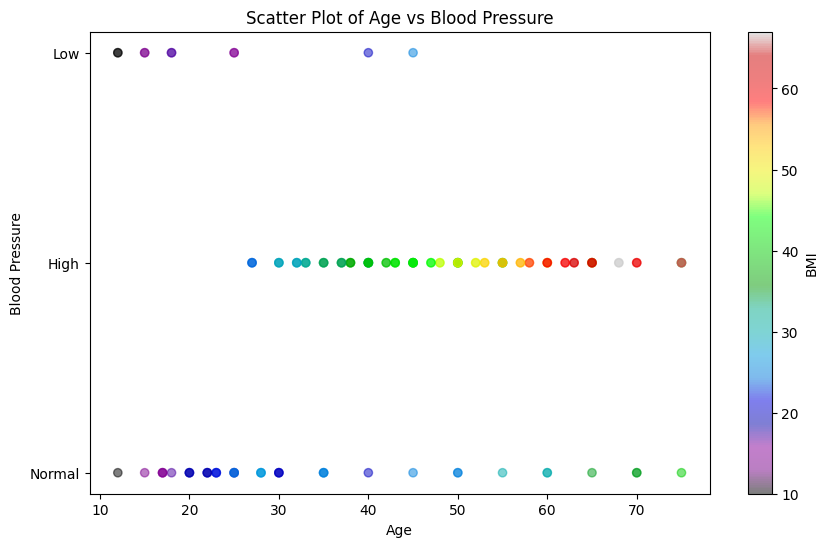

In [ ]:
# Create the scatter plot using your provided data
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
x = b['Age']  # Replace 'Age' with your desired x-axis column
y = b['Blood Pressure'] #Replace 'Blood Pressure' with your desired y-axis column
colors = b['BMI']  # Replace with your color column
#sizes = 10 * b['Glucose']  # Replace with your size column (scaled appropriately)


plt.scatter(x, y, c=colors,  alpha=0.5, cmap='nipy_spectral')
plt.colorbar(label='BMI') # Set colorbar label

plt.xlabel('Age') # Set x-axis label
plt.ylabel('Blood Pressure') # Set y-axis label
plt.title('Scatter Plot of Age vs Blood Pressure') # Set plot title
plt.show()


In [ ]:
b.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


LABEL ENCODER

In [ ]:
le=LabelEncoder()
columns=["Gender","Blood Pressure","Family History of Diabetes","Smoking","Diet","Exercise","Diagnosis"]
for col in columns:
  b[col]=le.fit_transform(b[col])

In [ ]:
b.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,1,25,2,100,5.7,0,0,0,1,0
1,55,0,30,0,120,6.4,1,1,1,0,1
2,65,1,35,0,140,7.1,1,1,1,0,1
3,75,0,40,0,160,7.8,1,1,1,0,1
4,40,1,20,2,80,5.0,0,0,0,1,0


In [ ]:
y=b["Diagnosis"]
x=b.drop(columns=["Diagnosis"])

In [ ]:
print(x.shape)
print(y.shape)

(128, 10)
(128,)


In [ ]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.3,random_state=42)
x_test,x_cv,y_test,y_cv=train_test_split(x_train,y_train,test_size=0.4,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_cv.shape)
print(x_temp.shape)
print(y_test.shape)
print(y_train.shape)
print(y_cv.shape)
print(y_temp.shape)


(89, 10)
(53, 10)
(36, 10)
(39, 10)
(53,)
(89,)
(36,)
(39,)


KNNCLASSIFIER

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_test_pred=knn.predict(x_test)
y_cv_pred=knn.predict(x_cv)

In [ ]:
accu=accuracy_score(y_test,y_test_pred)
cv_accu=accuracy_score(y_cv,y_cv_pred)
cm=confusion_matrix(y_cv,y_cv_pred)

test_prec=precision_score(y_test,y_test_pred,average="macro")
cv_prec=precision_score(y_cv,y_cv_pred,average="macro")

test_rec=recall_score(y_test,y_test_pred,average="macro")
cv_rec=recall_score(y_cv,y_cv_pred,average="macro")

In [ ]:
print(accu)
print(cv_accu)
print(test_prec)
print(cv_prec)
print(test_rec)
print(cv_rec)
print(cm)

0.8490566037735849
0.8611111111111112
0.9166666666666667
0.7516129032258064
0.6923076923076923
0.7166666666666667
[[28  2]
 [ 3  3]]


CONFUSION MATRIX HEAT MAP

<Axes: >

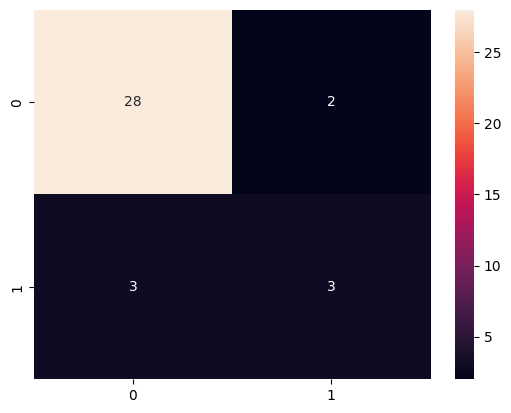

In [ ]:
sns.heatmap(cm,fmt="d",annot=True)

HYPERPARAMETER TUNING FOR KNN

In [ ]:
import math
k=list(range(1,50,2))
train_accuracy=[]
cv_accuracy=[]
for i in k:
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_train_pred=knn.predict(x_train)
  y_cv_pred=knn.predict(x_cv)
  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  cv_accuracy.append(accuracy_score(y_cv,y_cv_pred))
optimal_k=k[cv_accuracy.index(max(cv_accuracy))]
k_log=[math.log(x)for x in k]
print(optimal_k)

1


PLOT GRAPH

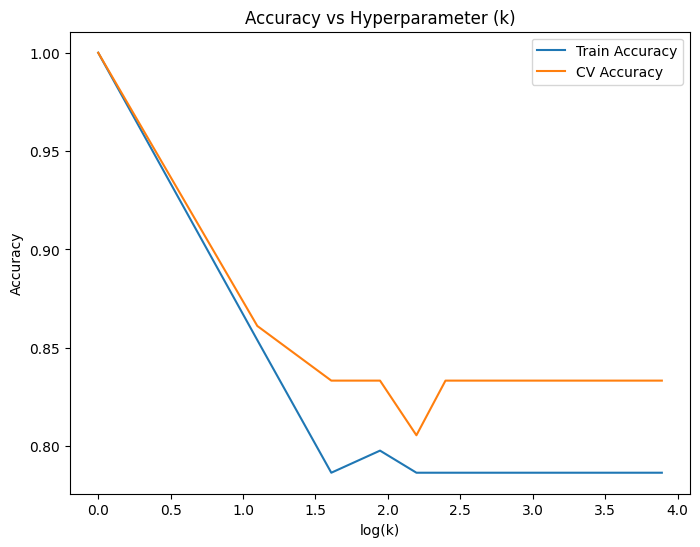

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(k_log, train_accuracy, label='Train Accuracy')
plt.plot(k_log, cv_accuracy, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (k)')
plt.xlabel('log(k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

OPTIMAL_K KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(x_train,y_train)
y_train_pred_h=knn.predict(x_train)
y_test_pred_h=knn.predict(x_test)
y_cv_pred_h=knn.predict(x_cv)

In [ ]:
accu_h=accuracy_score(y_train,y_train_pred_h)
test_accu_h=accuracy_score(y_test,y_test_pred_h)
cv_accu_h=accuracy_score(y_cv,y_cv_pred_h)
cm=confusion_matrix(y_test,y_test_pred_h)


test_prec_h=precision_score(y_test,y_test_pred_h,average="macro")
train_prec_h=precision_score(y_train,y_train_pred_h,average="macro")
cv_prec_h=precision_score(y_cv,y_cv_pred_h,average="macro")

test_recall_h=recall_score(y_test,y_test_pred_h,average="macro")
train_recall_h=recall_score(y_train,y_train_pred_h,average="macro")
cv_recall_h=recall_score(y_cv,y_cv_pred_h,average="macro")



print(accu_h)
print(test_accu_h)
print(cv_accu_h)
print(test_prec_h)
print(train_prec_h)
print(cv_prec_h)
print(test_recall_h)
print(train_recall_h)
print(cv_recall_h)

print(cm)



1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
[[40  0]
 [ 0 13]]


confusion matrix for hyperparameter tuning

<Axes: >

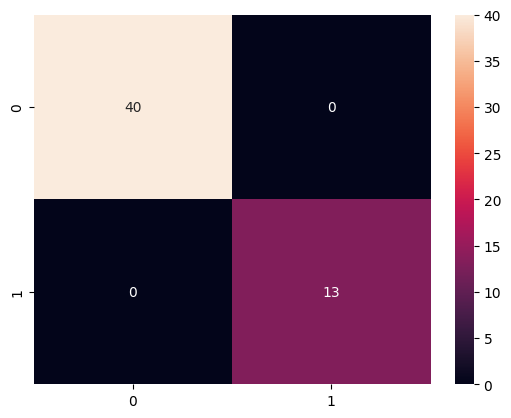

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
knn= pd.DataFrame([['KNN',accu_h,test_accu_h,cv_accu_h,train_prec_h,test_prec_h,cv_prec_h,train_recall_h,test_recall_h,cv_recall_h]],columns=col)
#results.loc[1] = new

In [ ]:
knn

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall
0,KNN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


NAIVE BAYES CODE

In [ ]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_test_pred_naive=mnb.predict(x_test)
y_cv_pred_naive=mnb.predict(x_cv)

In [ ]:
test_accu=accuracy_score(y_test,y_test_pred_naive)
cv_accu=accuracy_score(y_cv,y_cv_pred_naive)
test_precision = precision_score(y_test, y_test_pred_naive, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred_naive, average='micro')

test_recall = recall_score(y_test, y_test_pred_naive, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred_naive, average='micro')

cm=confusion_matrix(y_test,y_test_pred_naive)


In [ ]:
print(test_accu)
print(cv_accu)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)
print(cm)

0.8490566037735849
0.8055555555555556
0.8490566037735849
0.8055555555555556
0.8490566037735849
0.8055555555555556
[[38  2]
 [ 6  7]]


HYPERPARAMETER TUNING FOR NAIVE BAYES

In [ ]:
alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in alpha:
    clf = MultinomialNB(alpha = i)
    clf.fit(x_train, y_train)

    y_train_pred_naives= clf.predict(x_train)
    y_cv_pred_naives = clf.predict(x_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred_naives))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred_naives))

optimal_alpha= alpha[cv_auc.index(max(cv_auc))]
alpha=[math.log(x) for x in alpha]

In [ ]:
print(optimal_alpha)

0.01


plot graph for hyperparameter tuning naive bayes

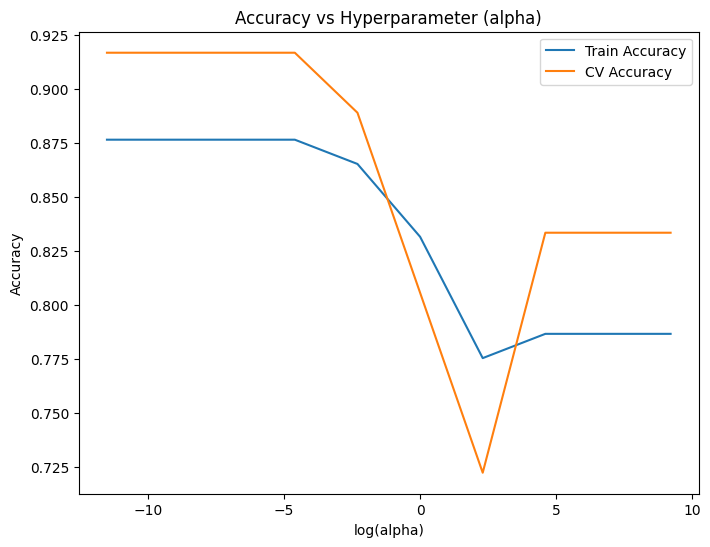

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(alpha, train_auc, label='Train Accuracy')
plt.plot(alpha, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (alpha)')
plt.xlabel('log(alpha)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

OPTIMAL_ALPHA FOR NAIVE BAYES

In [ ]:
clf = MultinomialNB(alpha = optimal_alpha )
clf.fit(x_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred_naive=clf.predict(x_train)
y_test_pred_naive= clf.predict(x_test)
y_cv_pred_naive = clf.predict(x_cv)

# Evaluate the model
train_accuracy_nb= accuracy_score(y_train,y_train_pred_naive)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_naive)
cv_accuracy_nb = accuracy_score(y_cv, y_cv_pred_naive)

train_precision_nb= precision_score(y_train,y_train_pred_naive, average='micro')
test_precision_nb = precision_score(y_test, y_test_pred_naive, average='micro')
cv_precision_nb = precision_score(y_cv, y_cv_pred_naive, average='micro')

train_recall_nb= recall_score(y_train,y_train_pred_naive, average='micro')
test_recall_nb = recall_score(y_test, y_test_pred_naive, average='micro')
cv_recall_nb = recall_score(y_cv, y_cv_pred_naive, average='micro')



cm_test = confusion_matrix(y_test, y_test_pred_naive)


In [ ]:
print(train_accuracy_nb)
print(test_accuracy_nb)
print(cv_accuracy_nb)
print(train_precision_nb)
print(test_precision_nb)
print(cv_precision_nb)
print(train_recall_nb)
print(test_recall_nb)
print(cv_recall_nb)

print(cm_test)

0.8764044943820225
0.8490566037735849
0.9166666666666666
0.8764044943820225
0.8490566037735849
0.9166666666666666
0.8764044943820225
0.8490566037735849
0.9166666666666666
[[38  2]
 [ 6  7]]


CONFUSION MATRIX FOR HYPERPARAMETER TUNING FOR NAIVE BAYES

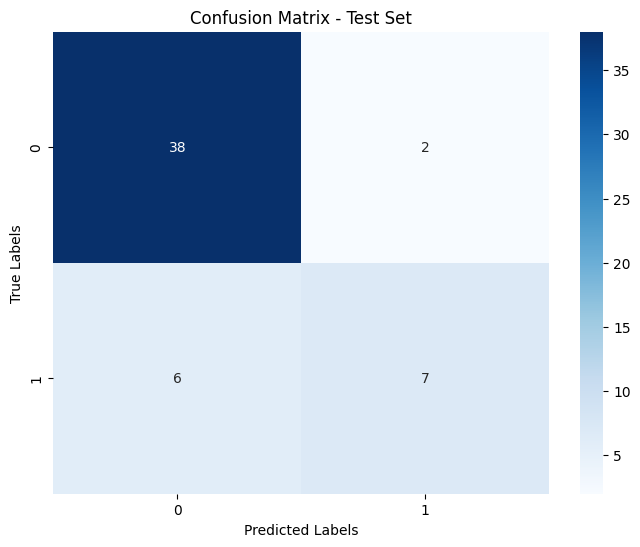

In [ ]:
 #Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred_naive)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
naivebayes= pd.DataFrame([['naivebayes',train_accuracy_nb,test_accuracy_nb,cv_accuracy_nb,train_precision_nb,test_precision_nb,cv_precision_nb,train_recall_nb,test_recall_nb,cv_recall_nb]],columns=col)
#results.loc[1] = new

LOGISTIC REGRESSION OF L1

In [ ]:
from sklearn.linear_model import LogisticRegression
l1_model=LogisticRegression(penalty="l1",solver="liblinear",random_state=42)
l1_model.fit(x_train,y_train)
y_test_pred_log=l1_model.predict(x_test)
y_cv_pred_log=l1_model.predict(x_cv)


In [ ]:
test_accu=accuracy_score(y_test,y_test_pred_log)
cv_accu=accuracy_score(y_cv,y_cv_pred_log)
test_precision = precision_score(y_test, y_test_pred_log, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred_log, average='micro')

test_recall = recall_score(y_test, y_test_pred_log, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred_log, average='micro')

cm=confusion_matrix(y_test,y_test_pred_log)

print(test_accu)
print(cv_accu)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)
print(cm)


1.0
1.0
1.0
1.0
1.0
1.0
[[40  0]
 [ 0 13]]


In [ ]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    l1_model= LogisticRegression(penalty="l1",C=i,solver="liblinear")
    l1_model.fit(x_train, y_train)

    y_train_pred= l1_model.predict(x_train)
    y_cv_pred = l1_model.predict(x_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]


In [ ]:
print(optimal_c)

10000


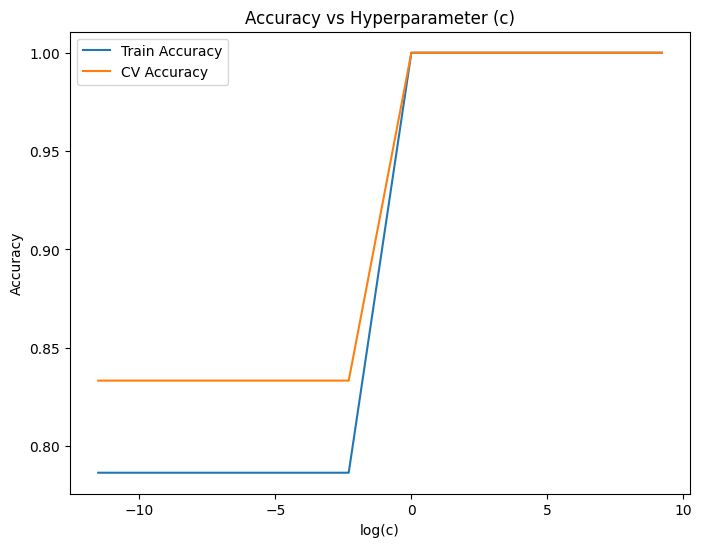

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
l1_model=LogisticRegression(penalty="l1",C=optimal_c,solver="liblinear")
l1_model.fit(x_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred_log_h=l1_model.predict(x_train)
y_test_pred_log_h= l1_model.predict(x_test)
y_cv_pred_log_h = l1_model.predict(x_cv)


In [ ]:
train_accu=accuracy_score(y_train,y_train_pred_log_h)
test_accu=accuracy_score(y_test,y_test_pred_log_h)
cv_accu=accuracy_score(y_cv,y_cv_pred_log_h)

train_precision=precision_score(y_train,y_train_pred_log_h)
test_precision = precision_score(y_test, y_test_pred_log_h, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred_log_h, average='micro')

train_recall=recall_score(y_train,y_train_pred_log_h)
test_recall = recall_score(y_test, y_test_pred_log_h, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred_log_h, average='micro')

cm=confusion_matrix(y_test,y_test_pred_log_h)

print(train_accu)
print(test_accu)
print(cv_accu)
print(train_precision)
print(test_precision)
print(cv_precision)
print(train_recall)
print(test_recall)
print(cv_recall)
print(cm)


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
[[40  0]
 [ 0 13]]


In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
L1= pd.DataFrame([['L1',train_accu,test_accu,cv_accu,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall]],columns=col)
#results.loc[1] = new

LOGISTIC REGRESSION FOR L2

In [ ]:
from sklearn.linear_model import LogisticRegression
l2_model=LogisticRegression(penalty="l2",solver="liblinear",random_state=42)
l2_model.fit(x_train,y_train)
y_test_pred_log2=l2_model.predict(x_test)
y_cv_pred_log2=l2_model.predict(x_cv)


In [ ]:
test_accu=accuracy_score(y_test,y_test_pred_log2)
cv_accu=accuracy_score(y_cv,y_cv_pred_log2)
test_precision = precision_score(y_test, y_test_pred_log2, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred_log2, average='micro')

test_recall = recall_score(y_test, y_test_pred_log2, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred_log2, average='micro')

cm=confusion_matrix(y_test,y_test_pred_log2)

print(test_accu)
print(cv_accu)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)
print(cm)


0.9622641509433962
1.0
0.9622641509433962
1.0
0.9622641509433962
1.0
[[40  0]
 [ 2 11]]


HYPERPARAMETER TUNING FOR L2

In [ ]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    l2_model= LogisticRegression(penalty="l2",C=i,solver="liblinear")
    l2_model.fit(x_train, y_train)

    y_train_pred_log2 = l2_model.predict(x_train)
    y_cv_pred_log2= l2_model.predict(x_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred_log2))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred_log2))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]
print(optimal_c)


10000


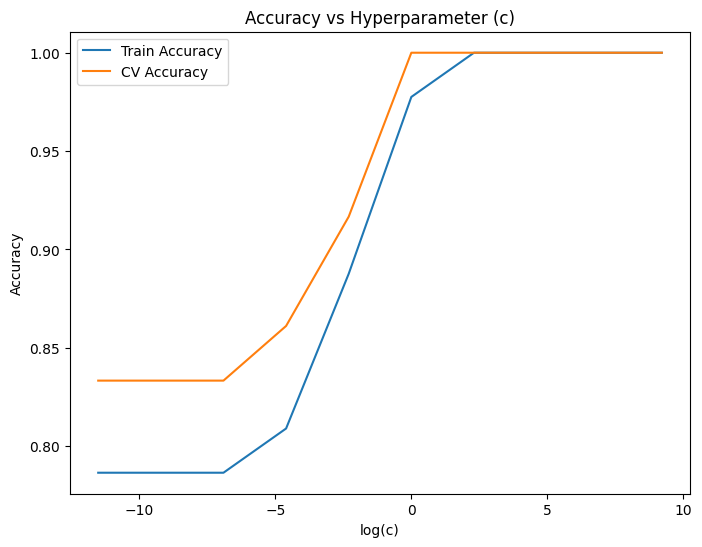

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
l2_model=LogisticRegression(penalty="l2",C=optimal_c,solver="liblinear")
l2_model.fit(x_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred_log2=l2_model.predict(x_train)
y_test_pred_log2 = l2_model.predict(x_test)
y_cv_pred_log2= l2_model.predict(x_cv)


In [ ]:
train_accu=accuracy_score(y_train,y_train_pred_log2)
test_accu=accuracy_score(y_test,y_test_pred_log_h)
cv_accu=accuracy_score(y_cv,y_cv_pred_log_h)

train_precision=precision_score(y_train,y_train_pred_log2)
test_precision = precision_score(y_test, y_test_pred_log_h, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred_log_h, average='micro')

train_recall=recall_score(y_train,y_train_pred_log2)
test_recall = recall_score(y_test, y_test_pred_log_h, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred_log_h, average='micro')

cm=confusion_matrix(y_test,y_test_pred_log_h)

print(train_accu)
print(test_accu)
print(cv_accu)
print(train_precision)
print(test_precision)
print(cv_precision)
print(train_recall)
print(test_recall)
print(cv_recall)
print(cm)


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
[[40  0]
 [ 0 13]]


<Axes: >

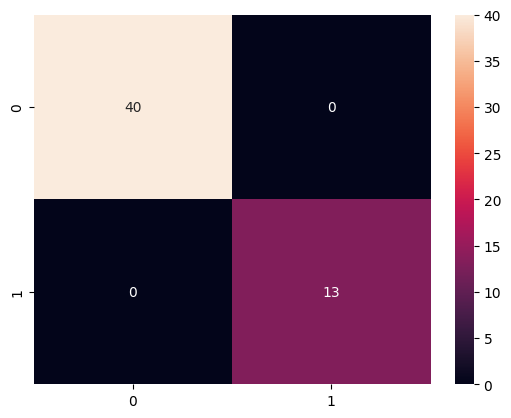

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
L2= pd.DataFrame([['L2',train_accu,test_accu,cv_accu,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall]],columns=col)
#results.loc[1] = new

In [ ]:
from sklearn.linear_model import LogisticRegression
elastic_net_model=LogisticRegression(penalty="elasticnet",solver="saga",random_state=42,l1_ratio=0.5)
elastic_net_model.fit(x_train,y_train)
y_test_pred_ela=elastic_net_model.predict(x_test)
y_cv_pred_ela=elastic_net_model.predict(x_cv)




In [ ]:
test_accu=accuracy_score(y_test,y_test_pred_ela)
cv_accu=accuracy_score(y_cv,y_cv_pred_ela)
test_precision = precision_score(y_test, y_test_pred_ela, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred_ela, average='micro')

test_recall = recall_score(y_test, y_test_pred_ela, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred_ela, average='micro')

cm=confusion_matrix(y_test,y_test_pred_ela)

print(test_accu)
print(cv_accu)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)
print(cm)


0.7358490566037735
0.8055555555555556
0.7358490566037735
0.8055555555555556
0.7358490566037735
0.8055555555555556
[[39  1]
 [13  0]]


<Axes: >

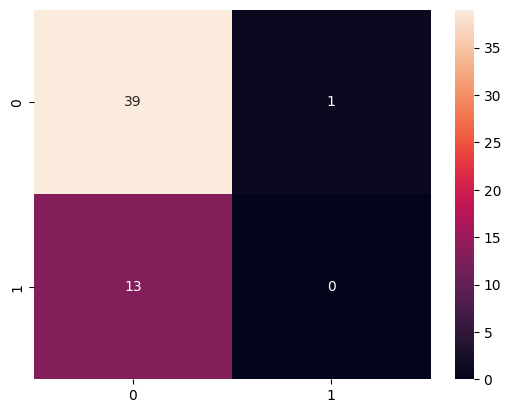

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    elastic_net_model= LogisticRegression(penalty="elasticnet",C=i,solver="saga",l1_ratio=0.5)
    elastic_net_model.fit(x_train, y_train)

    y_train_pred_ela = elastic_net_model.predict(x_train)
    y_cv_pred_ela= elastic_net_model.predict(x_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred_ela))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred_ela))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]
print(optimal_c)


0.1


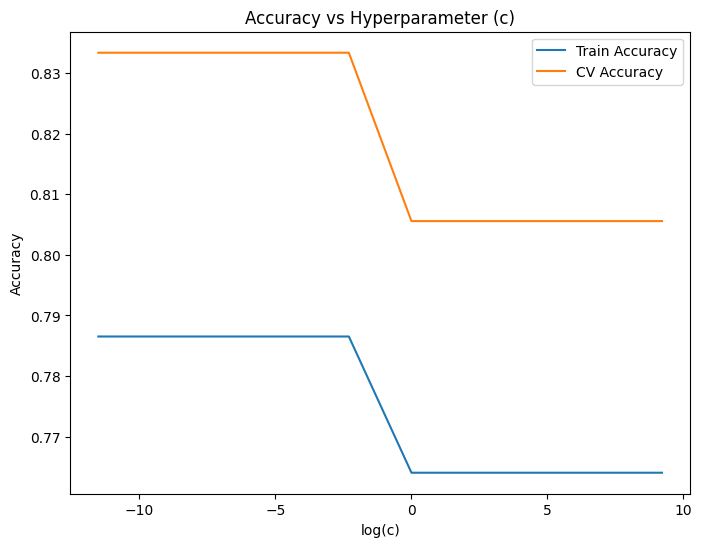

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
elastic_net_model=LogisticRegression(penalty="elasticnet",C=optimal_c,solver="saga",l1_ratio=0.5)
elastic_net_model.fit(x_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred_ela=elastic_net_model.predict(x_train)
y_test_pred_ela= elastic_net_model.predict(x_test)
y_cv_pred_ela = elastic_net_model.predict(x_cv)


In [ ]:
train_accu=accuracy_score(y_train,y_train_pred_ela)
test_accu=accuracy_score(y_test,y_test_pred_ela)
cv_accu=accuracy_score(y_cv,y_cv_pred_ela)

train_precision=precision_score(y_train,y_train_pred_ela)
test_precision = precision_score(y_test, y_test_pred_ela, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred_ela, average='micro')

train_recall=recall_score(y_train,y_train_pred_ela)
test_recall = recall_score(y_test, y_test_pred_ela, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred_ela, average='micro')

cm=confusion_matrix(y_test,y_test_pred_ela)

print(train_accu)
print(test_accu)
print(cv_accu)
print(train_precision)
print(test_precision)
print(cv_precision)
print(train_recall)
print(test_recall)
print(cv_recall)
print(cm)


0.7865168539325843
0.7547169811320755
0.8333333333333334
0.0
0.7547169811320755
0.8333333333333334
0.0
0.7547169811320755
0.8333333333333334
[[40  0]
 [13  0]]


<Axes: >

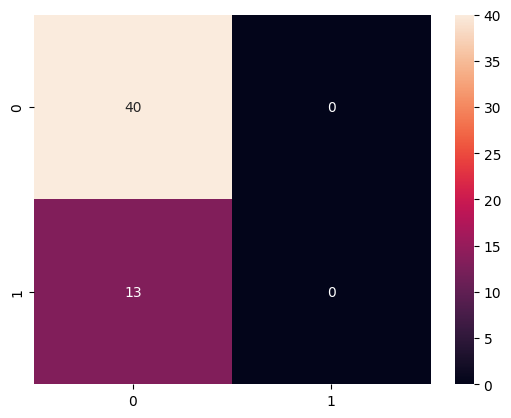

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
ElasticNet= pd.DataFrame([['ElasticNet',train_accu,test_accu,cv_accu,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall]],columns=col)
#results.loc[1] = new

LINEARSVC ALGORITHM

In [ ]:

from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC



log = LinearSVC()
log.fit(x_train, y_train)

# Predict on the test set and cross-validation set
y_test_pred = log.predict(x_test)
y_cv_pred = log.predict(x_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

cm_s=confusion_matrix(y_test,y_test_pred)

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)
print(cm_s)

0.8867924528301887
0.9722222222222222
0.8867924528301887
0.9722222222222222
0.8867924528301887
0.9722222222222222
[[40  0]
 [ 6  7]]


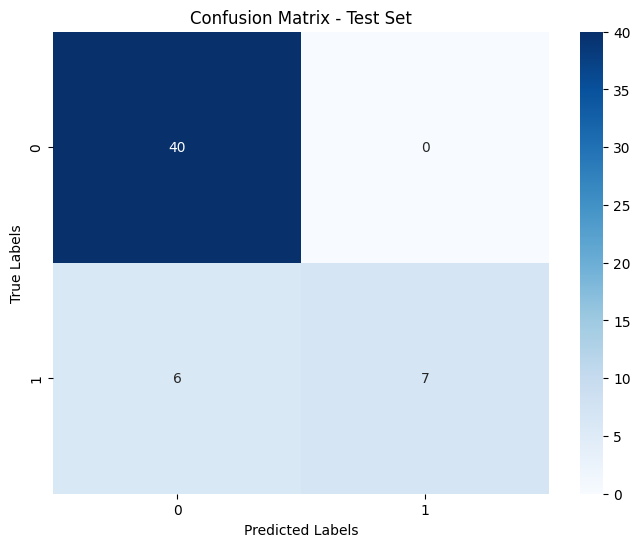

In [ ]:
# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_s, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:

    clf = LinearSVC(C=i)
    clf.fit(x_train, y_train)

    y_train_pred_svc = clf.predict(x_train)
    y_cv_pred_svc = clf.predict(x_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred_svc))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred_svc))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]

In [ ]:
print(optimal_c)

100


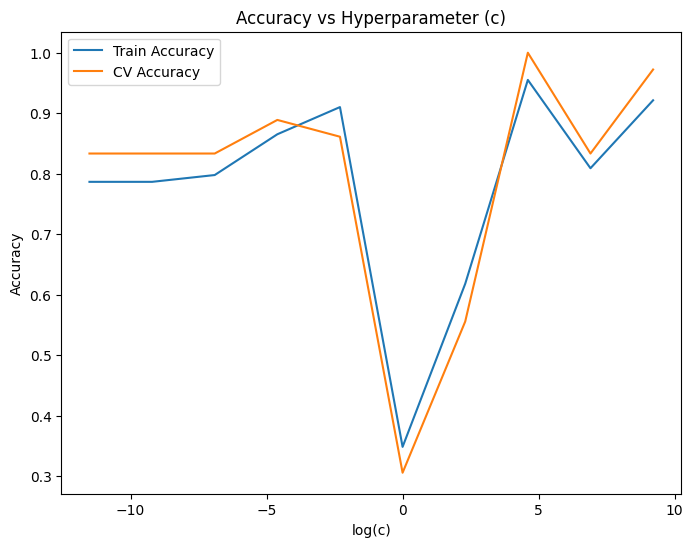

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
clf = LinearSVC(C=optimal_c)
clf.fit(x_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred=clf.predict(x_train)
y_test_pred = clf.predict(x_test)
y_cv_pred = clf.predict(x_cv)

# Evaluate the model
train_accuracy_log= accuracy_score(y_train,y_train_pred)
test_accuracy_log = accuracy_score(y_test, y_test_pred)
cv_accuracy_log = accuracy_score(y_cv, y_cv_pred)

train_precision_log= precision_score(y_train,y_train_pred, average='micro')
test_precision_log = precision_score(y_test, y_test_pred, average='micro')
cv_precision_log = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_log= recall_score(y_train,y_train_pred, average='micro')
test_recall_log = recall_score(y_test, y_test_pred, average='micro')
cv_recall_log = recall_score(y_cv, y_cv_pred, average='micro')



cm=confusion_matrix(y_test,y_test_pred)

In [ ]:
print(train_accuracy_log)
print(test_accuracy_log)
print(cv_accuracy_log)
print(train_precision_log)
print(test_precision_log)
print(cv_precision_log)
print(train_recall_log)
print(test_recall_log)
print(cv_recall_log)
print(cm)

0.8764044943820225
0.8490566037735849
0.9166666666666666
0.8764044943820225
0.8490566037735849
0.9166666666666666
0.8764044943820225
0.8490566037735849
0.9166666666666666
[[40  0]
 [ 8  5]]


<Axes: >

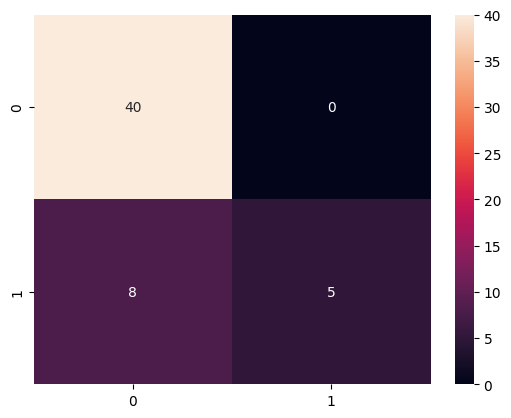

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
LINEARSVM= pd.DataFrame([['LINEARSVM',train_accuracy_log,test_accuracy_log,cv_accuracy_log,train_precision_log,test_precision_log,cv_precision_log,train_recall_log,test_recall_log,cv_recall_log]],columns=col)
#results.loc[1] = new

RBFM ALGORITHM CODE

In [ ]:
from sklearn.svm import SVC

rbf_svm = SVC(kernel='rbf')
log.fit(x_train, y_train)

# Predict on the test set and cross-validation set
y_test_pred_rbfm = log.predict(x_test)
y_cv_pred_rbfm = log.predict(x_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred_rbfm)
cv_accuracy = accuracy_score(y_cv, y_cv_pred_rbfm)

test_precision = precision_score(y_test, y_test_pred_rbfm, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred_rbfm, average='micro')

test_recall = recall_score(y_test, y_test_pred_rbfm, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred_rbfm, average='micro')


cm_rbfm=confusion_matrix(y_test,y_test_pred_rbfm)

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)
print(cm_rbfm)

0.660377358490566
0.5833333333333334
0.660377358490566
0.5833333333333334
0.660377358490566
0.5833333333333334
[[22 18]
 [ 0 13]]


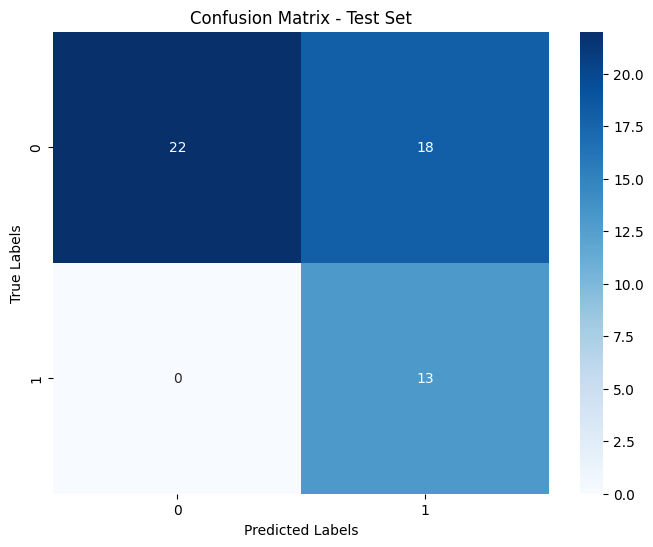

In [ ]:
# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbfm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:

    clf = SVC(C=i,kernel='rbf')
    clf.fit(x_train, y_train)

    y_train_pred_rbfm = clf.predict(x_train)
    y_cv_pred_rbfm = clf.predict(x_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]

In [ ]:
print(optimal_c)

10000


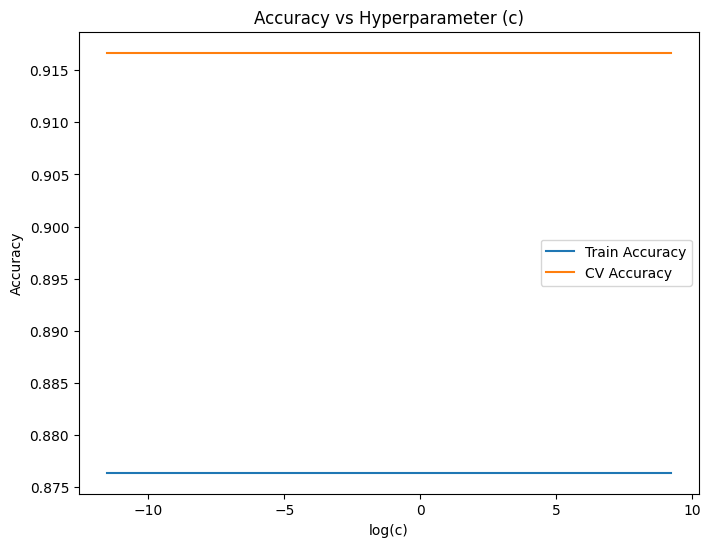

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
clf = SVC(C=optimal_c,kernel='rbf')
clf.fit(x_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred=clf.predict(x_train)
y_test_pred = clf.predict(x_test)
y_cv_pred = clf.predict(x_cv)

# Evaluate the model
train_accuracy_log= accuracy_score(y_train,y_train_pred)
test_accuracy_log = accuracy_score(y_test, y_test_pred)
cv_accuracy_log = accuracy_score(y_cv, y_cv_pred)

train_precision_log= precision_score(y_train,y_train_pred, average='micro')
test_precision_log = precision_score(y_test, y_test_pred, average='micro')
cv_precision_log = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_log= recall_score(y_train,y_train_pred, average='micro')
test_recall_log = recall_score(y_test, y_test_pred, average='micro')
cv_recall_log = recall_score(y_cv, y_cv_pred, average='micro')

cm_rbfm=confusion_matrix(y_test,y_test_pred)

In [ ]:
print(train_accuracy_log)
print(test_accuracy_log)
print(cv_accuracy_log)
print(train_precision_log)
print(test_precision_log)
print(cv_precision_log)
print(train_recall_log)
print(test_recall_log)
print(cv_recall_log)

print(cm_rbfm)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
[[40  0]
 [ 0 13]]


<Axes: >

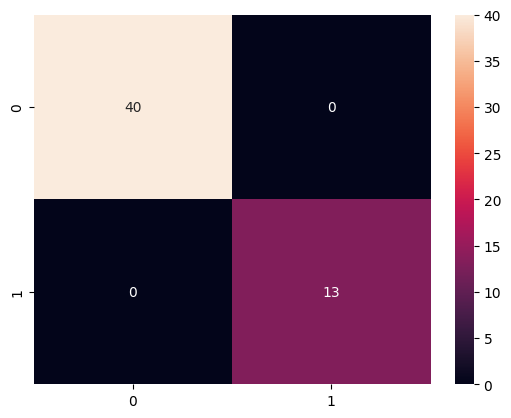

In [ ]:
sns.heatmap(cm_rbfm,annot=True,fmt="d")

In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
LINEARRBFM= pd.DataFrame([['LINEARRBFM',train_accuracy_log,test_accuracy_log,cv_accuracy_log,train_precision_log,test_precision_log,cv_precision_log,train_recall_log,test_recall_log,cv_recall_log]],columns=col)
#results.loc[1] = new

DECISIONTREE CLASSIFIER ALGORITHM(GRID SEARCH CV)


In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()

model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(x_train, y_train)

print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)


optimal min_samples_split 10
optimal max_depth 5


HYPERPARAMETER TUNING FOR DECISIONTREECLASSIFIER

In [ ]:
clf = DecisionTreeClassifier(max_depth = 1,min_samples_split = 5)
clf.fit(x_train,y_train)
# Predict on the test set and cross-validation set
y_train_pred=clf.predict(x_train)
y_test_pred = clf.predict(x_test)
y_cv_pred = clf.predict(x_cv)

# Evaluate the model
train_accuracy_dt= accuracy_score(y_train,y_train_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)
cv_accuracy_dt = accuracy_score(y_cv, y_cv_pred)

train_precision_dt= precision_score(y_train,y_train_pred, average='micro')
test_precision_dt = precision_score(y_test, y_test_pred, average='micro')
cv_precision_dt = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_dt= recall_score(y_train,y_train_pred, average='micro')
test_recall_dt = recall_score(y_test, y_test_pred, average='micro')
cv_recall_dt = recall_score(y_cv, y_cv_pred, average='micro')


cm_dt=confusion_matrix(y_test,y_test_pred)

In [ ]:
print(train_accuracy_dt)
print(test_accuracy_dt)
print(cv_accuracy_dt)
print(train_precision_dt)
print(test_precision_dt)
print(cv_precision_dt)
print(train_recall_dt)
print(test_recall_dt)
print(cv_recall_dt)

print(cm_dt)

0.7865168539325843
0.7547169811320755
0.8333333333333334
0.7865168539325843
0.7547169811320755
0.8333333333333334
0.7865168539325843
0.7547169811320755
0.8333333333333334
[[40  0]
 [13  0]]


In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
DecisionTree1= pd.DataFrame([['DecisionTree(GRIDSEARCHCV)',train_accuracy_dt,test_accuracy_dt,cv_accuracy_dt,train_precision_dt,test_precision_dt,cv_precision_dt,train_recall_dt,test_recall_dt,cv_recall_dt]],columns=col)
#results.loc[1] = new

DECISION TREE CLASSIFIER(RANDOMSEARCHCV)

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV


dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()

model = RandomizedSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3,n_iter=10,random_state=42)
model.fit(x_train, y_train)

print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)


optimal min_samples_split 10
optimal max_depth 10


In [ ]:
clf = DecisionTreeClassifier(max_depth = 1,min_samples_split = 5)
clf.fit(x_train,y_train)
# Predict on the test set and cross-validation set
y_train_pred=clf.predict(x_train)
y_test_pred = clf.predict(x_test)
y_cv_pred = clf.predict(x_cv)

# Evaluate the model
train_accuracy_rd= accuracy_score(y_train,y_train_pred)
test_accuracy_rd = accuracy_score(y_test, y_test_pred)
cv_accuracy_rd= accuracy_score(y_cv, y_cv_pred)

train_precision_rd= precision_score(y_train,y_train_pred, average='micro')
test_precision_rd= precision_score(y_test, y_test_pred, average='micro')
cv_precision_rd = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_rd= recall_score(y_train,y_train_pred, average='micro')
test_recall_rd = recall_score(y_test, y_test_pred, average='micro')
cv_recall_rd = recall_score(y_cv, y_cv_pred, average='micro')


cm_rd=confusion_matrix(y_test,y_test_pred)

In [ ]:
print(train_accuracy_rd)
print(test_accuracy_rd)
print(cv_accuracy_rd)
print(train_precision_rd)
print(test_precision_rd)
print(cv_precision_rd)
print(train_recall_rd)
print(test_recall_rd)
print(cv_recall_rd)

print(cm_rd)

0.7865168539325843
0.7547169811320755
0.8333333333333334
0.7865168539325843
0.7547169811320755
0.8333333333333334
0.7865168539325843
0.7547169811320755
0.8333333333333334
[[40  0]
 [13  0]]


In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
DecisionTree= pd.DataFrame([['DECISION(RandomSearchcv)',train_accuracy_rd,test_accuracy_rd,cv_accuracy_rd,train_precision_rd,test_precision_rd,cv_precision_rd,train_recall_rd,test_recall_rd,cv_recall_rd]],columns=col)
#results.loc[1] = new

RANDOM FOREST CLASSIFIER ALOGORITHM

In [ ]:

from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
model.fit(x_train, y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)


optimal n_estimators 20
optimal max_depth 5


In [ ]:

optimal_max_depth = model.best_estimator_.max_depth
optimal_n_estimators = model.best_estimator_.n_estimators


In [ ]:
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(x_train, y_train)
# Predict on the test set and cross-validation set
y_train_pred=clf.predict(x_train)
y_test_pred = clf.predict(x_test)
y_cv_pred = clf.predict(x_cv)

# Evaluate the model
train_accuracy_rd= accuracy_score(y_train,y_train_pred)
test_accuracy_rd = accuracy_score(y_test, y_test_pred)
cv_accuracy_rd = accuracy_score(y_cv, y_cv_pred)

train_precision_rd= precision_score(y_train,y_train_pred, average='micro')
test_precision_rd = precision_score(y_test, y_test_pred, average='micro')
cv_precision_rd = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_rd= recall_score(y_train,y_train_pred, average='micro')
test_recall_rd = recall_score(y_test, y_test_pred, average='micro')
cv_recall_rd = recall_score(y_cv, y_cv_pred, average='micro')


cm_rd=confusion_matrix(y_test,y_test_pred)

In [ ]:
print(train_accuracy_rd)
print(test_accuracy_rd)
print(cv_accuracy_rd)
print(train_precision_rd)
print(test_precision_rd)
print(cv_precision_rd)
print(train_recall_rd)
print(test_recall_rd)
print(cv_recall_rd)

print(cm_rd)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
[[40  0]
 [ 0 13]]


<Axes: >

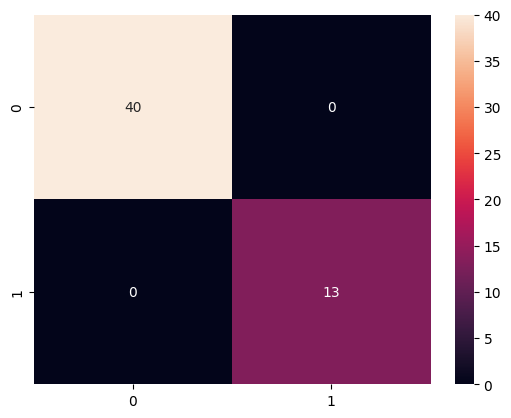

In [ ]:
sns.heatmap(cm_rd,annot=True,fmt="d")

In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
RANDOMFOREST1= pd.DataFrame([['RANDOMFOREST(GRID SEARCHCV)',train_accuracy_rd,test_accuracy_rd,cv_accuracy_rd,train_precision_rd,test_precision_rd,cv_precision_rd,train_recall_rd,test_recall_rd,cv_recall_rd]],columns=col)
#results.loc[1] = new

RANDOMFOREST (RANDOM SEARCHCV)

In [ ]:

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV


dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = RandomForestClassifier()

model = RandomizedSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3,n_iter=10,random_state=42)
model.fit(x_train, y_train)

print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)


optimal min_samples_split 5
optimal max_depth 50


In [ ]:

optimal_max_depth = model.best_estimator_.max_depth
optimal_n_estimators = model.best_estimator_.n_estimators


In [ ]:
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(x_train, y_train)
# Predict on the test set and cross-validation set
y_train_pred=clf.predict(x_train)
y_test_pred = clf.predict(x_test)
y_cv_pred = clf.predict(x_cv)

# Evaluate the model
train_accuracy_rd= accuracy_score(y_train,y_train_pred)
test_accuracy_rd = accuracy_score(y_test, y_test_pred)
cv_accuracy_rd = accuracy_score(y_cv, y_cv_pred)

train_precision_rd= precision_score(y_train,y_train_pred, average='micro')
test_precision_rd = precision_score(y_test, y_test_pred, average='micro')
cv_precision_rd = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_rd= recall_score(y_train,y_train_pred, average='micro')
test_recall_rd = recall_score(y_test, y_test_pred, average='micro')
cv_recall_rd = recall_score(y_cv, y_cv_pred, average='micro')


cm_rd=confusion_matrix(y_test,y_test_pred)

In [ ]:
print(train_accuracy_rd)
print(test_accuracy_rd)
print(cv_accuracy_rd)
print(train_precision_rd)
print(test_precision_rd)
print(cv_precision_rd)
print(train_recall_rd)
print(test_recall_rd)
print(cv_recall_rd)

print(cm_rd)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
[[40  0]
 [ 0 13]]


In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
RANDOMFOREST= pd.DataFrame([['RANDOMFOREST(RANDOMSEARCHCV)',train_accuracy_rd,test_accuracy_rd,cv_accuracy_rd,train_precision_rd,test_precision_rd,cv_precision_rd,train_recall_rd,test_recall_rd,cv_recall_rd]],columns=col)
#results.loc[1] = new

XGBOOST(GRIDSEARCHCV)

In [ ]:
# #!pip uninstall xgboost -y
# !pip install xgboost==2.1.3
# #!pip uninstall scikit-learn -y
# !pip install scikit-learn==1.2.2

In [ ]:
# prompt: xgboost code

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, y_train, X_test, y_test, X_cv, y_cv are defined from previous code

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [20, 40, 60, 80, 100, 120],
    'max_depth': [1, 5, 10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBoost classifier
clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Perform GridSearchCV
model = GridSearchCV(clf, param_grid, scoring='roc_auc', n_jobs=-1, cv=3)
model.fit(x_train, y_train)

# Print optimal hyperparameters
print("optimal n_estimators:", model.best_estimator_.n_estimators)
print("optimal max_depth:", model.best_estimator_.max_depth)
print("optimal learning_rate:", model.best_estimator_.learning_rate)
print("optimal subsample:", model.best_estimator_.subsample)
print("optimal colsample_bytree:", model.best_estimator_.colsample_bytree)


# Train the model with the best hyperparameters
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth
optimal_learning_rate = model.best_estimator_.learning_rate
optimal_subsample = model.best_estimator_.subsample
optimal_colsample_bytree = model.best_estimator_.colsample_bytree



optimal n_estimators: 120
optimal max_depth: 5
optimal learning_rate: 0.01
optimal subsample: 1.0
optimal colsample_bytree: 0.8


In [ ]:
clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss',
                        n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, learning_rate = optimal_learning_rate,
                        subsample = optimal_subsample, colsample_bytree= optimal_colsample_bytree)

clf.fit(x_train, y_train)

# Predict on the test set and cross-validation set
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
y_cv_pred = clf.predict(x_cv)




In [ ]:
train_accuracy_xgb = accuracy_score(y_train, y_train_pred)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred)
cv_accuracy_xgb = accuracy_score(y_cv, y_cv_pred)

train_precision_xgb = precision_score(y_train, y_train_pred, average='micro')
test_precision_xgb = precision_score(y_test, y_test_pred, average='micro')
cv_precision_xgb = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_xgb = recall_score(y_train, y_train_pred, average='micro')
test_recall_xgb = recall_score(y_test, y_test_pred, average='micro')
cv_recall_xgb = recall_score(y_cv, y_cv_pred, average='micro')

print(train_accuracy_xgb)
print(test_accuracy_xgb)
print(cv_accuracy_xgb)
print(train_precision_xgb)
print(test_precision_xgb)
print(cv_precision_xgb)
print(train_recall_xgb)
print(test_recall_xgb)
print(cv_recall_xgb)


0.9662921348314607
0.9622641509433962
0.9722222222222222
0.9662921348314607
0.9622641509433962
0.9722222222222222
0.9662921348314607
0.9622641509433962
0.9722222222222222


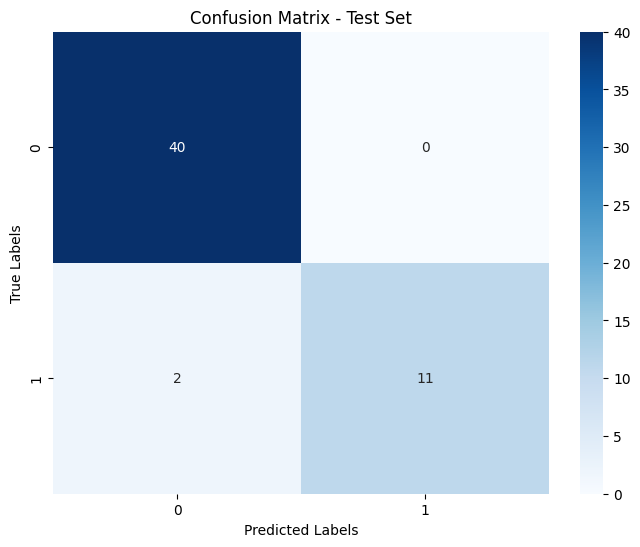

In [ ]:

#Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
XGBOOST1= pd.DataFrame([['XGBOOST(GRIDSEARCHCV)',train_accuracy_xgb,test_accuracy_xgb,cv_accuracy_xgb,train_precision_xgb,test_precision_xgb,cv_precision_xgb,train_recall_xgb,test_recall_xgb,cv_recall_xgb]],columns=col)
#results.loc[1] = new

XGBOOST(RANANDOMIZEDSEARCHCV)

In [ ]:
# prompt: xgboost code

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, y_train, X_test, y_test, X_cv, y_cv are defined from previous code

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [20, 40, 60, 80, 100, 120],
    'max_depth': [1, 5, 10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBoost classifier
clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Perform RandomizedSearchCV
model = RandomizedSearchCV(clf, param_grid, scoring='roc_auc', n_jobs=-1, cv=3,n_iter=10,random_state=42)
model.fit(x_train, y_train)

# Print optimal hyperparameters
print("optimal n_estimators:", model.best_estimator_.n_estimators)
print("optimal max_depth:", model.best_estimator_.max_depth)
print("optimal learning_rate:", model.best_estimator_.learning_rate)
print("optimal subsample:", model.best_estimator_.subsample)
print("optimal colsample_bytree:", model.best_estimator_.colsample_bytree)


# Train the model with the best hyperparameters
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth
optimal_learning_rate = model.best_estimator_.learning_rate
optimal_subsample = model.best_estimator_.subsample
optimal_colsample_bytree = model.best_estimator_.colsample_bytree



optimal n_estimators: 100
optimal max_depth: 1000
optimal learning_rate: 0.01
optimal subsample: 0.9
optimal colsample_bytree: 0.8


In [ ]:
clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss',
                        n_estimators=optimal_n_estimators, max_depth=optimal_max_depth, learning_rate = optimal_learning_rate,
                        subsample = optimal_subsample, colsample_bytree= optimal_colsample_bytree)

clf.fit(x_train, y_train)

# Predict on the test set and cross-validation set
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
y_cv_pred = clf.predict(x_cv)




In [ ]:
train_accuracy_xgb = accuracy_score(y_train, y_train_pred)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred)
cv_accuracy_xgb = accuracy_score(y_cv, y_cv_pred)

train_precision_xgb = precision_score(y_train, y_train_pred, average='micro')
test_precision_xgb = precision_score(y_test, y_test_pred, average='micro')
cv_precision_xgb = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_xgb = recall_score(y_train, y_train_pred, average='micro')
test_recall_xgb = recall_score(y_test, y_test_pred, average='micro')
cv_recall_xgb = recall_score(y_cv, y_cv_pred, average='micro')

print(train_accuracy_xgb)
print(test_accuracy_xgb)
print(cv_accuracy_xgb)
print(train_precision_xgb)
print(test_precision_xgb)
print(cv_precision_xgb)
print(train_recall_xgb)
print(test_recall_xgb)
print(cv_recall_xgb)


0.9662921348314607
0.9622641509433962
0.9722222222222222
0.9662921348314607
0.9622641509433962
0.9722222222222222
0.9662921348314607
0.9622641509433962
0.9722222222222222


In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
XGBOOST= pd.DataFrame([['XGBOOST(Randomsearchcv)',train_accuracy_xgb,test_accuracy_xgb,cv_accuracy_xgb,train_precision_xgb,test_precision_xgb,cv_precision_xgb,train_recall_xgb,test_recall_xgb,cv_recall_xgb]],columns=col)
#results.loc[1] = new

In [ ]:
result=pd.DataFrame()
result=pd.concat([result,knn,naivebayes,L1,L2,ElasticNet,LINEARSVM,LINEARRBFM,DecisionTree1,DecisionTree,RANDOMFOREST1,RANDOMFOREST,XGBOOST1,XGBOOST],ignore_index=True)
result

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall
0,KNN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,naivebayes,0.876404,0.849057,0.916667,0.876404,0.849057,0.916667,0.876404,0.849057,0.916667
2,L1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,L2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,ElasticNet,0.786517,0.754717,0.833333,0.000000,0.754717,0.833333,0.000000,0.754717,0.833333
5,LINEARSVM,0.876404,0.849057,0.916667,0.876404,0.849057,0.916667,0.876404,0.849057,0.916667
6,LINEARRBFM,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,DecisionTree(GRIDSEARCHCV),0.786517,0.754717,0.833333,0.786517,0.754717,0.833333,0.786517,0.754717,0.833333
8,DECISION(RandomSearchcv),0.786517,0.754717,0.833333,0.786517,0.754717,0.833333,0.786517,0.754717,0.833333
9,RANDOMFOREST(GRID SEARCHCV),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# prompt: dump only knn in the pickle file

import pickle

# Assuming 'knn' is your trained KNeighborsClassifier model
# Replace this with your actual knn model

# Example:
# knn = KNeighborsClassifier(n_neighbors=5) # Replace with your actual knn model
# knn.fit(x_train, y_train) # Replace with your actual training data

with open('knn_model.pkl', 'wb') as f:
  pickle.dump(knn, f)


PICKLE CODE FOR ALL ALGORITHMS

In [ ]:
# # prompt: dump all algorithms in single pickle file code

# import pickle

# # Assuming knn, naivebayes, L1, L2, ElasticNet, LINEARSVM, LINEARRBFM, DecisionTree, RANDOMFOREST, XGBOOST are defined
# # from your previous code.  Replace these with your actual trained model objects.

# # Example: Assuming 'knn' is your KNeighborsClassifier model object
# # knn = KNeighborsClassifier()  # Replace with your actual trained model

# # Create a dictionary to store your models
# models = {
#     'knn': knn,
#     'naivebayes': naivebayes,
#     'L1': L1,
#     'L2': L2,
#     'ElasticNet': ElasticNet,
#     'LINEARSVM': LINEARSVM,
#     'LINEARRBFM': LINEARRBFM,
#     'DecisionTree': DecisionTree,
#     'RANDOMFOREST': RANDOMFOREST,
#     'XGBOOST': XGBOOST
# }


# # Save the dictionary to a pickle file
# with open('all_models.pkl1', 'wb') as file:
#     pickle.dump(models, file)
